In [ ]:

from cmath import nan
from curses import raw
import os 
import pathlib
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
years = [2013, 2014, 2016, 2017, 2018, 2019, 2020]


path = "/content/drive/MyDrive/Water_Quality_Data/Rivers/"

# Replce paths with GDRIVE PATHS 
river_path = "/content/drive/MyDrive/Water_Quality_Data/Rivers/"

gw_path = "/content/drive/MyDrive/Water_Quality_Data/Ground_Water/"

sea_path = "/content/drive/MyDrive/Water_Quality_Data/Sea_Water/"


Columns Needed and their index in the df after readinf from the xcel sheets

|              | 13, 14, 20 | 16-19 |
|--------------|------------|-------|
| Station Code | 0          | 0     |
| State        | 2          | 2     |
| Temp_min     | 3          | 3     |
| Temp_max     | 4          | 4     |
| DO MIN       | 6          | 5     |
| DO MAX       | 7          | 6     |
| PH MIN       | 9          | 7     |
| PH MAX       | 10         | 8     |
| COND MIN     | 12         | 9     |
| COND MAX     | 13         | 10    |
| BCOD MIN     | 15         | 11    |
| BCOD MAX     | 16         | 12    |
| NIT MIN      | 18         | 13    |
| NIT MAX      | 19         | 14    |
| FC MIN       | 21         | 15    |
| FC MAX       | 22         | 16    |
| TC MIN       | 24         | 17    |
| TC MAX       | 25         | 18    |


---
|  Year              | Rows to be dropped|
|--------------------|----------------------------------------------|
| 2013,14,20         | Unnamed: 0, 1, 5, 8, 11, 14, 17, 20, 23, 26|
| 2016 - 2019        | Unnamed: 0, 1, 19, 20|


In [ ]:
#River Data 

raw_df_list = []
path = river_path

for year in years:
  
  # NO data of 2020 for rivers
  if(year == 2020):
    continue
  
  files_read = 0
  files = os.listdir(path+str(year)+"/")

  for file in files:
    file_path = path+str(year)+"/"+file
    if pathlib.Path(file_path).suffix == ".xlsx":
      files_read+=1
      raw_df = pd.read_excel(file_path)
      
      if (year == 2013 or year == 2014):
        raw_df = raw_df.drop(["Unnamed: 0", 1,2,5,8,11,14,17,20,23,26], axis = 1)
        
      else:
        raw_df = raw_df.drop(['Unnamed: 0',1,2], axis = 1 )
        # instead of dropping rows 19 and 20 delete them only if they are present
        # 19, 20 rows are TC
        if 19 in raw_df.columns:
          raw_df = raw_df.drop([19], axis = 1 )
        if 20 in raw_df.columns:
          raw_df = raw_df.drop([20], axis = 1 )
      
      if(len(raw_df.columns) < 16):
        continue
      raw_df.columns = ['Station_Code', 'Temp_Min', 'Temp_Max', 'DO_Min', 'DO_Max', 'PH_Min', 'PH_Max', 'Cond_Min', 'Cond_Max', 'BCOD_Min', 'BCOD_Max', 'Nit_Min', 'Nit_Max', 'FC_Min', 'FC_Max', 'TC_Min', 'TC_Max']
          
      #removing header rows
      raw_df = raw_df.drop([0,1,2], axis =0 )

      # re-indicing rows
      raw_df.index=range(0,len(raw_df))

      # Adding year column to data frame
      raw_df['year'] = year

      # print(raw_df)
      raw_df_list.append(raw_df)

river_df  = pd.concat(raw_df_list, ignore_index=True)

river_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5256 entries, 0 to 5255
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Station_Code  5187 non-null   object
 1   Temp_Min      5128 non-null   object
 2   Temp_Max      5134 non-null   object
 3   DO_Min        5137 non-null   object
 4   DO_Max        5138 non-null   object
 5   PH_Min        5192 non-null   object
 6   PH_Max        5197 non-null   object
 7   Cond_Min      5028 non-null   object
 8   Cond_Max      5028 non-null   object
 9   BCOD_Min      5102 non-null   object
 10  BCOD_Max      5107 non-null   object
 11  Nit_Min       4919 non-null   object
 12  Nit_Max       4911 non-null   object
 13  FC_Min        4509 non-null   object
 14  FC_Max        4514 non-null   object
 15  TC_Min        4771 non-null   object
 16  TC_Max        4776 non-null   object
 17  year          5256 non-null   int64 
dtypes: int64(1), object(17)
memory usage: 739.2+ KB


In [ ]:
# Ground Water Data

raw_df_list = []
path = gw_path

for year in years:
  
  # NO data of 2020 for rivers
  if(year == 2020):
    continue
  
  files_read = 0
  files = os.listdir(path+str(year)+"/")

  for file in files:
    file_path = path+str(year)+"/"+file
    if pathlib.Path(file_path).suffix == ".xlsx":
      files_read+=1
      raw_df = pd.read_excel(file_path)
      
      if (year == 2013 or year == 2014):
        raw_df = raw_df.drop(["Unnamed: 0", 1,2,5,8,11,14,17,20,23], axis = 1)
        
      else:
        raw_df = raw_df.drop(['Unnamed: 0',1,2], axis = 1 )
        # instead of dropping rows 19 and 20 delete them only if they are present
        # 19, 20 rows are TC
        if 19 in raw_df.columns:
          raw_df = raw_df.drop([19], axis = 1 )
        if 20 in raw_df.columns:
          raw_df = raw_df.drop([20], axis = 1 )
      
      if(len(raw_df.columns) != 17):
        continue
      raw_df.columns = ['Station_Code', 'Temp_Min', 'Temp_Max', 'DO_Min', 'DO_Max', 'PH_Min', 'PH_Max', 'Cond_Min', 'Cond_Max', 'BCOD_Min', 'BCOD_Max', 'Nit_Min', 'Nit_Max', 'FC_Min', 'FC_Max', 'TC_Min', 'TC_Max']
          
      #removing header rows
      raw_df = raw_df.drop([0,1,2], axis =0 )

      # re-indicing rows
      raw_df.index=range(0,len(raw_df))

      # Adding year column to data frame
      raw_df['year'] = year

      # print(raw_df)
      raw_df_list.append(raw_df)

gw_df  = pd.concat(raw_df_list, ignore_index=True)

gw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Station_Code  942 non-null    object
 1   Temp_Min      843 non-null    object
 2   Temp_Max      843 non-null    object
 3   DO_Min        360 non-null    object
 4   DO_Max        360 non-null    object
 5   PH_Min        923 non-null    object
 6   PH_Max        923 non-null    object
 7   Cond_Min      925 non-null    object
 8   Cond_Max      925 non-null    object
 9   BCOD_Min      629 non-null    object
 10  BCOD_Max      629 non-null    object
 11  Nit_Min       859 non-null    object
 12  Nit_Max       859 non-null    object
 13  FC_Min        644 non-null    object
 14  FC_Max        644 non-null    object
 15  TC_Min        670 non-null    object
 16  TC_Max        670 non-null    object
 17  year          942 non-null    int64 
dtypes: int64(1), object(17)
memory usage: 132.6+ KB


In [ ]:
# Sea Water Data

raw_df_list = []
path = sea_path

for year in years:
  
  # NO data of 2020 for rivers
  if(year == 2020 or year == 2013 or year == 2014):
    continue
  
  files_read = 0
  files = os.listdir(path+str(year)+"/")

  for file in files:
    file_path = path+str(year)+"/"+file
    if pathlib.Path(file_path).suffix == ".xlsx":
      files_read+=1
      raw_df = pd.read_excel(file_path)
      
      if (year == 2013 or year == 2014):
        raw_df = raw_df.drop(["Unnamed: 0", 1,2,5,8,11,14,17,20,23], axis = 1)
        
      else:
        raw_df = raw_df.drop(['Unnamed: 0',1,2], axis = 1 )
        # instead of dropping rows 19 and 20 delete them only if they are present
        # 19, 20 rows are TC
        if 19 in raw_df.columns:
          raw_df = raw_df.drop([19], axis = 1 )
        if 20 in raw_df.columns:
          raw_df = raw_df.drop([20], axis = 1 )
      
      if(len(raw_df.columns) != 17):
        continue
      raw_df.columns = ['Station_Code', 'Temp_Min', 'Temp_Max', 'DO_Min', 'DO_Max', 'PH_Min', 'PH_Max', 'Cond_Min', 'Cond_Max', 'BCOD_Min', 'BCOD_Max', 'Nit_Min', 'Nit_Max', 'FC_Min', 'FC_Max', 'TC_Min', 'TC_Max']
          
      #removing header rows
      raw_df = raw_df.drop([0,1,2], axis =0 )

      # re-indicing rows
      raw_df.index=range(0,len(raw_df))

      # Adding year column to data frame
      raw_df['year'] = year

      # print(raw_df)
      raw_df_list.append(raw_df)

sea_df  = pd.concat(raw_df_list, ignore_index=True)

sea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Station_Code  442 non-null    object
 1   Temp_Min      442 non-null    object
 2   Temp_Max      386 non-null    object
 3   DO_Min        386 non-null    object
 4   DO_Max        379 non-null    object
 5   PH_Min        379 non-null    object
 6   PH_Max        441 non-null    object
 7   Cond_Min      441 non-null    object
 8   Cond_Max      409 non-null    object
 9   BCOD_Min      409 non-null    object
 10  BCOD_Max      438 non-null    object
 11  Nit_Min       438 non-null    object
 12  Nit_Max       381 non-null    object
 13  FC_Min        381 non-null    object
 14  FC_Max        382 non-null    object
 15  TC_Min        382 non-null    object
 16  TC_Max        390 non-null    object
 17  year          442 non-null    int64 
dtypes: int64(1), object(17)
memory usage: 62.3+ KB


In [ ]:
df_list = [river_df, gw_df, sea_df]

def isnumber(x):
    try:
        float(x)
        return True
    except:
        return False

for i in range(len(df_list)):
  # df = df[df.applymap(isnumber)]  
  # df = df.dropna()
  df_list[i] = df_list[i].apply (pd.to_numeric, errors='coerce')
  df_list[i] = df_list[i].dropna()
  df_list[i] = df_list[i].astype(
      {
        'Station_Code':'int',
        'Temp_Min' : 'float64',
        'Temp_Max' : 'float64',
        'DO_Min' : 'float64',
        'DO_Max' : 'float64',
        'PH_Min' : 'float64',
        'PH_Max' : 'float64',
        'Cond_Min' : 'float64',
        'Cond_Max' : 'float64',
        'BCOD_Min' : 'float64',
        'BCOD_Max' : 'float64',
        'Nit_Min' : 'float64',
        'Nit_Max' : 'float64',
        'FC_Min' : 'float64',
        'FC_Max' : 'float64',
        'TC_Min' : 'float64',
        'TC_Max' : 'float64',
        'year':'int32'
      })
  df_list[i]['Temperature']= df_list[i].iloc[:,1:3].mean(axis=1)
  df_list[i]['DO'] = df_list[i].iloc[:,3:5].mean(axis=1)
  df_list[i]['PH'] = df_list[i].iloc[:,5:7].mean(axis=1)
  df_list[i]['Cond'] = df_list[i].iloc[:,7:9].mean(axis=1)
  df_list[i]['BCOD'] = df_list[i].iloc[:,9:11].mean(axis=1)
  df_list[i]['Nit'] = df_list[i].iloc[:,11:13].mean(axis=1)
  df_list[i]['FC'] = df_list[i].iloc[:,13:15].mean(axis=1)
  df_list[i]['TC'] = df_list[i].iloc[:,15:17].mean(axis=1)
  
  print(df_list[i])


  # Everything works smooth till here


      Station_Code  Temp_Min  Temp_Max  DO_Min  DO_Max  PH_Min  PH_Max  \
0             1641      20.0      29.0     6.8     8.4     7.5     8.5   
6             1081      15.0      37.0     6.3     8.6     7.0     8.4   
7             1082      21.0      32.0     5.8     8.4     7.3     8.3   
8             1083      26.0      34.0     6.4     8.8     7.5     8.5   
10            1084      22.0      29.0     4.5     7.8     7.4     8.3   
...            ...       ...       ...     ...     ...     ...     ...   
5249          1315      19.0      30.0     6.4     8.0     8.1     8.8   
5252          3330      16.1      30.1     7.2     7.7     7.2     8.3   
5253          1910      18.2      38.0     5.7     8.0     7.7     8.6   
5254          2173      16.0      35.0     5.9     8.2     7.2     8.8   
5255          2175      16.0      46.0     5.7     8.4     7.2     9.0   

      Cond_Min  Cond_Max  BCOD_Min  ...   TC_Max  year  Temperature    DO  \
0        127.0     349.0       0.6

In [ ]:
for df in df_list:
  print(df)
  # df['Temperature']= df.iloc[:,1:3].mean(axis=1)
  

      Station_Code  Temp_Min  Temp_Max  DO_Min  DO_Max  PH_Min  PH_Max  \
0             1641      20.0      29.0     6.8     8.4     7.5     8.5   
6             1081      15.0      37.0     6.3     8.6     7.0     8.4   
7             1082      21.0      32.0     5.8     8.4     7.3     8.3   
8             1083      26.0      34.0     6.4     8.8     7.5     8.5   
10            1084      22.0      29.0     4.5     7.8     7.4     8.3   
...            ...       ...       ...     ...     ...     ...     ...   
5249          1315      19.0      30.0     6.4     8.0     8.1     8.8   
5252          3330      16.1      30.1     7.2     7.7     7.2     8.3   
5253          1910      18.2      38.0     5.7     8.0     7.7     8.6   
5254          2173      16.0      35.0     5.9     8.2     7.2     8.8   
5255          2175      16.0      46.0     5.7     8.4     7.2     9.0   

      Cond_Min  Cond_Max  BCOD_Min  ...   TC_Max  year  Temperature    DO  \
0        127.0     349.0       0.6

In [ ]:
wq_river_df = pd.DataFrame()
wq_gw_df = pd.DataFrame()
wq_sea_df = pd.DataFrame()

wq_df_list = [wq_river_df, wq_gw_df, wq_sea_df]

for i in range(len(wq_df_list)):
  wq_df_list[i]['Station_Code'] = df_list[i]['Station_Code']
  wq_df_list[i]['year'] = df_list[i]['year']

  # PH Quality Rating
  wq_df_list[i]['npH'] = df_list[i].PH.apply(lambda x: (100 if (8.5>=x>=7)  
                                  else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                        else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                            else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                                else 0)))))



  # Dissolved Oxygen Quality Rating
  wq_df_list[i]['ndo'] = df_list[i].DO.apply(lambda x:(100 if (x>=6)  
                                  else(80 if  (6>=x>=5.1) 
                                        else(60 if (5>=x>=4.1)
                                            else(40 if (4>=x>=3) 
                                                else 0)))))

  # Fecal Coliform Quality Rating
  wq_df_list[i]['nFC'] = df_list[i].FC.apply(lambda x:(100 if (5>=x>=0)  
                                  else(80 if  (50>=x>=5) 
                                        else(60 if (500>=x>=50)
                                            else(40 if (10000>=x>=500) 
                                                else 0)))))
  # Biological Dissolved Oxygen Quality Rating
  wq_df_list[i]['nbdo'] = df_list[i].BCOD.apply(lambda x:(100 if (3>=x>=0)  
                                  else(80 if  (6>=x>=3) 
                                        else(60 if (80>=x>=6)
                                            else(40 if (125>=x>=80) 
                                                else 0)))))
  # Electrical Conductivity Quality Rating
  wq_df_list[i]['nec'] = df_list[i].Cond.apply(lambda x:(100 if (75>=x>=0)  
                                  else(80 if  (150>=x>=75) 
                                        else(60 if (225>=x>=150)
                                            else(40 if (300>=x>=225) 
                                                else 0)))))
  # Nitrate Quality Rating
  wq_df_list[i]['nna'] = df_list[i].Nit.apply(lambda x:(100 if (20>=x>=0)  
                                  else(80 if  (50>=x>=20) 
                                        else(60 if (100>=x>=50)
                                            else(40 if (200>=x>=100) 
                                                else 0)))))

  print(wq_df_list[i])
  print(wq_df_list[i].dtypes)

      Station_Code  year  npH  ndo  nFC  nbdo  nec  nna
0             1641  2013  100  100   40   100   40  100
6             1081  2013  100  100   40   100   80  100
7             1082  2013  100  100    0   100   80  100
8             1083  2013  100  100   40   100   60  100
10            1084  2013  100  100   40   100    0  100
...            ...   ...  ...  ...  ...   ...  ...  ...
5249          1315  2019  100  100   60    80    0  100
5252          3330  2019  100  100   80   100    0  100
5253          1910  2019  100  100   60    80    0  100
5254          2173  2019  100  100   80    80    0  100
5255          2175  2019  100  100   80    80    0  100

[3881 rows x 8 columns]
Station_Code    int64
year            int32
npH             int64
ndo             int64
nFC             int64
nbdo            int64
nec             int64
nna             int64
dtype: object
     Station_Code  year  npH  ndo  nFC  nbdo  nec  nna
0               6  2019  100    0  100   100    0  100
1  

In [ ]:
for i in range(len(wq_df_list)):
  wq_df_list[i]['wph'] = wq_df_list[i].npH * 0.165
  wq_df_list[i]['wdo'] = wq_df_list[i].ndo * 0.281
  wq_df_list[i]['wbdo'] = wq_df_list[i].nbdo * 0.234
  wq_df_list[i]['wec'] = wq_df_list[i].nec* 0.009
  wq_df_list[i]['wna'] = wq_df_list[i].nna * 0.028
  wq_df_list[i]['wco'] = wq_df_list[i].nec * 0.281
  wq_df_list[i]['wqi'] = wq_df_list[i].wph + wq_df_list[i].wdo + wq_df_list[i].wbdo + wq_df_list[i].wec + wq_df_list[i].wna + wq_df_list[i].wco 
  

  wq_df_list[i]['quality']= wq_df_list[i].wqi.apply(lambda x:('Excellent' if (25>=x>=0)  
                                 else('Good' if  (50>=x>=26) 
                                      else('Poor' if (75>=x>=51)
                                          else('Very Poor' if (100>=x>=76) 
                                              else 'Unsuitable')))))
  print(wq_df_list[i].head())


    Station_Code  year  npH  ndo  nFC  nbdo  nec  nna   wph   wdo  wbdo   wec  \
0           1641  2013  100  100   40   100   40  100  16.5  28.1  23.4  0.36   
6           1081  2013  100  100   40   100   80  100  16.5  28.1  23.4  0.72   
7           1082  2013  100  100    0   100   80  100  16.5  28.1  23.4  0.72   
8           1083  2013  100  100   40   100   60  100  16.5  28.1  23.4  0.54   
10          1084  2013  100  100   40   100    0  100  16.5  28.1  23.4  0.00   

    wna    wco   wqi    quality  
0   2.8  11.24  82.4  Very Poor  
6   2.8  22.48  94.0  Very Poor  
7   2.8  22.48  94.0  Very Poor  
8   2.8  16.86  88.2  Very Poor  
10  2.8   0.00  70.8       Poor  
   Station_Code  year  npH  ndo  nFC  nbdo  nec  nna   wph    wdo  wbdo  wec  \
0             6  2019  100    0  100   100    0  100  16.5   0.00  23.4  0.0   
1          1948  2019  100    0  100   100    0  100  16.5   0.00  23.4  0.0   
2          1949  2019  100    0  100   100    0  100  16.5   0.00  23

In [ ]:
# years = [2019, 2018, 2017, 2016]

# path = "/content/drive/MyDrive/Water_Quality_Data/DATA/EXCEL_DATA/Rivers/"

# raw_df_list = []

# for year in years:
#     files_read = 0
#     files = os.listdir(path+str(year)+"/")
#     for file in files:
#         file_path = path+str(year)+"/"+file
#         if pathlib.Path(file_path).suffix == ".xlsx":
#             files_read+=1
#             # print("reading : ", file)
#             raw_df = pd.read_excel(file_path)
#             shape = raw_df.shape
#             # if(shape[1] != 22 ):
#                 # print("No of columns didnt match specification in file : ", file )
#             # break
#             raw_df = raw_df.drop(['Unnamed: 0',1,2], axis = 1 )
#             if 19 in raw_df.columns:
#                 raw_df = raw_df.drop([19], axis = 1 )
#             if 20 in raw_df.columns:
#                 raw_df = raw_df.drop([20], axis = 1 )
#             # instead of dropping rows 19 and 20 delete them only if they are present
#             raw_df = raw_df.drop([1,2], axis =0 )
#             raw_df = raw_df.drop([0], axis =0 )
#             raw_df.index=range(0,len(raw_df))
#             raw_df['year'] = year
#             # print(raw_df)
#             raw_df_list.append(raw_df)
#         # print("files read --- year : ", files_read, year)

# merge_df  = pd.concat(raw_df_list, ignore_index=True)
    

# merge_df.columns = ['Station_Code', 'Temp_Min', 'Temp_Max', 'DO_Min', 'DO_Max', 'PH_Min', 'PH_Max', 'Cond_Min', 'Cond_Max', 'BCOD_Min', 'BCOD_Max', 'Nit_Min', 'Nit_Max', 'FC_Min', 'FC_Max', 'TC_Min', 'TC_Max', 'year']

# # merge_df.to_excel("merge_op.xlsx")



# def isnumber(x):
#     try:
#         float(x)
#         return True
#     except:
#         return False

# merge_df = merge_df[merge_df.applymap(isnumber)]
# merge_df = merge_df.dropna()


# # for column in merge_df.columns:
# #     merge_df[column] = merge_df[column].str.replace(r'\D' , np.NaN)

# # print(merge_df['Station_Code'][2684])

# # print(len(np.unique(merge_df['Station_Code'])))

# merge_df = merge_df.astype('float64')
# merge_df = merge_df.astype({'Station_Code':'int', 'year':'int'})

# print(merge_df.info())


In [ ]:
# merge_df['Temperature']= merge_df.iloc[:,1:3].mean(axis=1)
# merge_df['DO']= merge_df.iloc[:,3:5].mean(axis=1)
# merge_df['PH']= merge_df.iloc[:,5:7].mean(axis=1)
# merge_df['Cond']= merge_df.iloc[:,7:9].mean(axis=1)
# merge_df['BCOD']= merge_df.iloc[:,9:11].mean(axis=1)
# merge_df['Nit']= merge_df.iloc[:,11:13].mean(axis=1)
# merge_df['FC']= merge_df.iloc[:,13:15].mean(axis=1)
# merge_df['TC']= merge_df.iloc[:,15:17].mean(axis=1)

# merge_df.info()

In [ ]:
# wq_df = pd.DataFrame()
# wq_df['Station_Code'] = merge_df['Station_Code']


In [ ]:
# wq_df['year'] = merge_df['year']

In [ ]:
# # PH Quality Rating
# wq_df['npH']=merge_df.PH.apply(lambda x: (100 if (8.5>=x>=7)  
#                                  else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
#                                       else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
#                                           else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
#                                               else 0)))))

In [ ]:
# # Dissolved Oxygen Quality Rating
# wq_df['ndo']=merge_df.DO.apply(lambda x:(100 if (x>=6)  
#                                  else(80 if  (6>=x>=5.1) 
#                                       else(60 if (5>=x>=4.1)
#                                           else(40 if (4>=x>=3) 
#                                               else 0)))))

In [ ]:
# # Fecal Coliform Quality Rating
# wq_df['nFC'] = merge_df.FC.apply(lambda x:(100 if (5>=x>=0)  
#                                  else(80 if  (50>=x>=5) 
#                                       else(60 if (500>=x>=50)
#                                           else(40 if (10000>=x>=500) 
#                                               else 0)))))

In [ ]:
# # Biological Dissolved Oxygen Quality Rating
# wq_df['nbdo'] = merge_df.BCOD.apply(lambda x:(100 if (3>=x>=0)  
#                                  else(80 if  (6>=x>=3) 
#                                       else(60 if (80>=x>=6)
#                                           else(40 if (125>=x>=80) 
#                                               else 0)))))

In [ ]:
# # Electrical Conductivity Quality Rating
# wq_df['nec'] = merge_df.Cond.apply(lambda x:(100 if (75>=x>=0)  
#                                  else(80 if  (150>=x>=75) 
#                                       else(60 if (225>=x>=150)
#                                           else(40 if (300>=x>=225) 
#                                               else 0)))))

In [ ]:
# # Nitrate Quality Rating
# wq_df['nna'] = merge_df.Nit.apply(lambda x:(100 if (20>=x>=0)  
#                                  else(80 if  (50>=x>=20) 
#                                       else(60 if (100>=x>=50)
#                                           else(40 if (200>=x>=100) 
#                                               else 0)))))

# wq_df.head()
# wq_df.dtypes

In [ ]:
# wq_df['wph'] = wq_df.npH * 0.165
# wq_df['wdo'] = wq_df.ndo * 0.281
# wq_df['wbdo'] = wq_df.nbdo * 0.234
# wq_df['wec'] = wq_df.nec* 0.009
# wq_df['wna'] = wq_df.nna * 0.028
# wq_df['wco'] = wq_df.nec * 0.281
# wq_df['wqi'] = wq_df.wph + wq_df.wdo + wq_df.wbdo + wq_df.wec + wq_df.wna + wq_df.wco 
# wq_df

In [ ]:
# wq_df['quality']=wq_df.wqi.apply(lambda x:('Excellent' if (25>=x>=0)  
#                                  else('Good' if  (50>=x>=26) 
#                                       else('Poor' if (75>=x>=51)
#                                           else('Very Poor' if (100>=x>=76) 
#                                               else 'Unsuitable')))))
# wq_df


River LSTM Prediction

In [ ]:
river_df = pd.DataFrame()
river_df['Station_Code'] = wq_df_list[0]['Station_Code']
river_df['year'] = wq_df_list[0]['year']
river_df['wqi'] = wq_df_list[0]['wqi']

river_df.head()

,Station_Code,year,wqi
0,1641,2013,82.4
6,1081,2013,94.0
7,1082,2013,94.0
8,1083,2013,88.2
10,1084,2013,70.8


In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
import time

In [ ]:
river_station_codes = sorted(list(set(river_df['Station_Code'].values)))

In [ ]:
dict1 = {}

for i in river_station_codes :
  dict1[i] = []

for i in river_df.index :
  station_code = river_df["Station_Code"][i]
  year = river_df["year"][i]
  wqi = river_df["wqi"][i]

  dict1[station_code].append([year,wqi])

In [ ]:
print(dict1[1100])

[[2019, 70.8]]


In [ ]:
river_seq = list()
for key,values in dict1.items():
  temp = [key]
  count = 0
  values = sorted(values)
  for v in values:
    if count > 0 :
      temp.pop()
    temp.append(v[0])
    temp.append(v[1])
    river_seq.append(temp.copy())
    #print(temp)
    count = count + 1
    


In [ ]:
river_seq[:10]
#1,2019,70.8
#1,2019,2018,70.8
#1,2019,2018,2016,61.44

[[1, 2016, 61.44],
 [1, 2016, 2018, 70.8],
 [1, 2016, 2018, 2019, 70.8],
 [2, 2016, 50.199999999999996],
 [2, 2016, 2018, 19.3],
 [4, 2013, 70.8],
 [4, 2013, 2016, 70.8],
 [4, 2013, 2016, 2017, 70.8],
 [4, 2013, 2016, 2017, 2018, 70.8],
 [4, 2013, 2016, 2017, 2018, 2019, 70.8]]

In [ ]:
max_lengh = max([len(i) for i in river_seq])

In [ ]:
river_seq = np.array(river_seq)
river_seq.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


(3881,)

In [ ]:
river_seq = pad_sequences(river_seq,maxlen = max_lengh,padding = 'pre')

In [ ]:
river_seq[0:10]

array([[   0,    0,    0,    0,    0,    0,    0,    1, 2016,   61],
       [   0,    0,    0,    0,    0,    0,    1, 2016, 2018,   70],
       [   0,    0,    0,    0,    0,    1, 2016, 2018, 2019,   70],
       [   0,    0,    0,    0,    0,    0,    0,    2, 2016,   50],
       [   0,    0,    0,    0,    0,    0,    2, 2016, 2018,   19],
       [   0,    0,    0,    0,    0,    0,    0,    4, 2013,   70],
       [   0,    0,    0,    0,    0,    0,    4, 2013, 2016,   70],
       [   0,    0,    0,    0,    0,    4, 2013, 2016, 2017,   70],
       [   0,    0,    0,    0,    4, 2013, 2016, 2017, 2018,   70],
       [   0,    0,    0,    4, 2013, 2016, 2017, 2018, 2019,   70]],
      dtype=int32)

In [ ]:
X,y = river_seq[:,:-1],river_seq[:,-1]


In [ ]:
y

array([61, 70, 70, ..., 66, 70, 88], dtype=int32)

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
import time
import random 

from random import randint
from pickle import load
from keras.models import load_model

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from bs4 import BeautifulSoup
from gensim.models import KeyedVectors
import pickle
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [ ]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer

from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout,Bidirectional,Activation, BatchNormalization,Flatten,Multiply
from keras.layers.core import Lambda
from keras.layers.merge import concatenate, add, multiply
from keras.models import Model

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.noise import GaussianNoise
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from tqdm import tqdm
from keras.preprocessing import text
from keras.utils import np_utils
from gensim.models import Word2Vec, KeyedVectors 
import gensim

In [ ]:
n_steps = 9
# split into samples
#X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [ ]:
# define model
model = Sequential()
#model.add(Embedding(vocab_size, 50, input_length=max_length-1))
#model.add(Dense(X.shape[0], activation='softmax'))
#odel = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
122/122 - 2s - loss: 16940.1191 - 2s/epoch - 17ms/step
Epoch 2/200
122/122 - 1s - loss: 3649.6008 - 668ms/epoch - 5ms/step
Epoch 3/200
122/122 - 1s - loss: 2020.4590 - 626ms/epoch - 5ms/step
Epoch 4/200
122/122 - 1s - loss: 703.0344 - 637ms/epoch - 5ms/step
Epoch 5/200
122/122 - 1s - loss: 339.6914 - 616ms/epoch - 5ms/step
Epoch 6/200
122/122 - 1s - loss: 380.5460 - 587ms/epoch - 5ms/step
Epoch 7/200
122/122 - 1s - loss: 317.2396 - 600ms/epoch - 5ms/step
Epoch 8/200
122/122 - 1s - loss: 546.6534 - 578ms/epoch - 5ms/step
Epoch 9/200
122/122 - 1s - loss: 513.6600 - 604ms/epoch - 5ms/step
Epoch 10/200
122/122 - 1s - loss: 411.0171 - 582ms/epoch - 5ms/step
Epoch 11/200
122/122 - 1s - loss: 249.3879 - 620ms/epoch - 5ms/step
Epoch 12/200
122/122 - 1s - loss: 234.7014 - 650ms/epoch - 5ms/step
Epoch 13/200
122/122 - 1s - loss: 299.2060 - 618ms/epoch - 5ms/step
Epoch 14/200
122/122 - 1s - loss: 244.2888 - 622ms/epoch - 5ms/step
Epoch 15/200
122/122 - 1s - loss: 219.6022 - 614ms/epoc

In [ ]:
x_input = array([0,0,0,0,0,0,0,1,2020])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

In [ ]:
lstm_river_pred = []

for i in river_station_codes :
  x_input = array([0,0,0,0,0,0,0,1,i])
  x_input = x_input.reshape((1,n_steps,n_features))

  output = model.predict(x_input,verbose = 0)
  lstm_river_pred.append(output[0][0])

In [ ]:
print(max(lstm_river_pred))

In [ ]:
start = 0
end = 100
width = end - start
res = (lstm_river_pred - min(lstm_river_pred))/(max(lstm_river_pred) - min(lstm_river_pred)) * width + start

Ground Water analysis LSTM

In [ ]:
gw_df = pd.DataFrame()
gw_df['Station_Code'] = wq_df_list[1]['Station_Code']
gw_df['year'] = wq_df_list[1]['year']
gw_df['wqi'] = wq_df_list[1]['wqi']

gw_df.head()

,Station_Code,year,wqi
0,6,2019,42.70
1,1948,2019,42.70
2,1949,2019,42.70
6,1954,2019,53.94
8,1956,2019,59.56


In [ ]:
gw_station_codes = sorted(list(set(gw_df['Station_Code'].values)))

In [ ]:
dict2 = {}

for i in gw_station_codes :
  dict2[i] = []

for i in gw_df.index :
  station_code = gw_df["Station_Code"][i]
  year = gw_df["year"][i]
  wqi = gw_df["wqi"][i]

  dict2[station_code].append([year,wqi])

In [ ]:
gw_seq = list()
for key,values in dict2.items():
  temp = [key]
  count = 0
  values = sorted(values)
  for v in values:
    if count > 0 :
      temp.pop()
    temp.append(v[0])
    temp.append(v[1])
    gw_seq.append(temp.copy())
    #print(temp)
    count = count + 1

In [ ]:
dict3 = {}

for i in gw_seq :
  dict3[i[1]] = 1

print(dict3)

{2019: 1}


GRU Model on River Data

In [ ]:
type(X)
X = X.astype(float)

In [ ]:
model2 = Sequential()

model2.add(Bidirectional(LSTM(64, activation='relu', input_shape=(n_steps, n_features))))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss = 'mse')
model2.fit(X,y,epochs = 8, verbose = 2)

Epoch 1/8
122/122 - 3s - loss: 5115.2007 - 3s/epoch - 27ms/step
Epoch 2/8
122/122 - 1s - loss: 5089.5161 - 1s/epoch - 8ms/step
Epoch 3/8
122/122 - 1s - loss: 5088.7998 - 1s/epoch - 8ms/step
Epoch 4/8
122/122 - 1s - loss: 5088.8315 - 993ms/epoch - 8ms/step
Epoch 5/8
122/122 - 1s - loss: 5088.8506 - 1s/epoch - 8ms/step
Epoch 6/8
122/122 - 1s - loss: 5088.5762 - 1s/epoch - 9ms/step
Epoch 7/8
122/122 - 1s - loss: 5088.4175 - 1s/epoch - 9ms/step
Epoch 8/8
122/122 - 1s - loss: 5088.4502 - 1s/epoch - 9ms/step


In [ ]:
bi_lstm_river_pred = []

#for i in river_station_codes :
x_input = array([0,0,0,0,0,0,0,1,2020])
x_input = x_input.reshape((1,n_steps,n_features))

output = model2.predict(x_input,verbose = 0)
bi_lstm_river_pred.append(output[0][0])
print(bi_lstm_river_pred)

[1.0]


In [ ]:
start = 0
end = 100
width = end - start
bi_lstm_river_pred = (bi_lstm_river_pred - min(bi_lstm_river_pred))/(max(bi_lstm_river_pred) - min(bi_lstm_river_pred)) * width + start

Analysis

In [ ]:
from matplotlib import pyplot as plt

In [ ]:

def create_pie_chart_for_river(year_num) :

  list1 = [0,0,0,0,0]
  for i in river_df.index :
  
    year = river_df["year"][i]
    if year == year_num :
      wq = river_df["wqi"][i]
      if wq >= 0 and wq <= 25 :
        list1[0] = list1[0] + 1
      elif wq >= 26 and wq <= 50 :
        list1[1] = list1[1] + 1
      elif wq >= 51 and wq <= 75 : 
        list1[2] = list1[2] + 1 
      elif wq >= 76 and wq <= 100 :
        list1[3] = list1[3] + 1
      else :
        list1[4] = list1[4] + 1
  
  
  names = ["Excellent","Good","Poor","Very Poor","Unsuitable"]
  fig = plt.figure(figsize =(10, 7))
  plt.pie(list1,labels = names,autopct='%1.2f%%')
  plt.show()


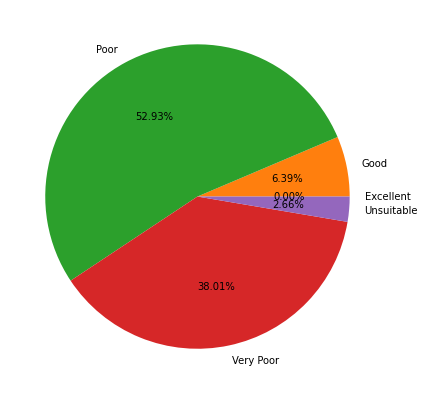

In [ ]:
create_pie_chart_for_river(2013)

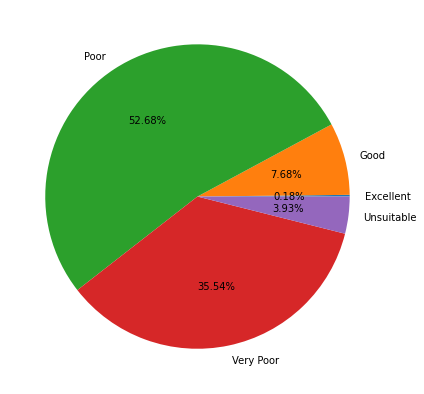

In [ ]:
create_pie_chart_for_river(2014)

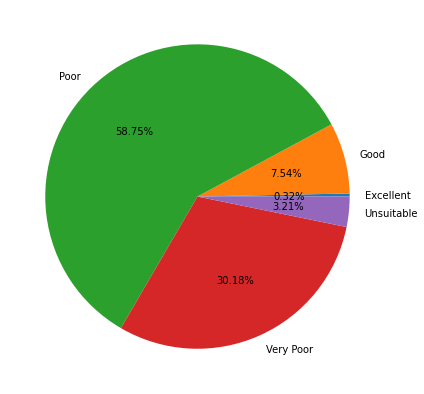

In [ ]:
create_pie_chart_for_river(2016)

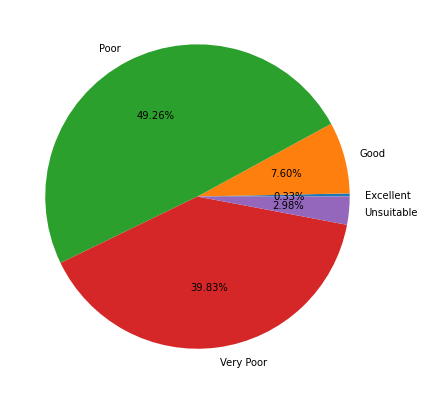

In [ ]:
create_pie_chart_for_river(2017)

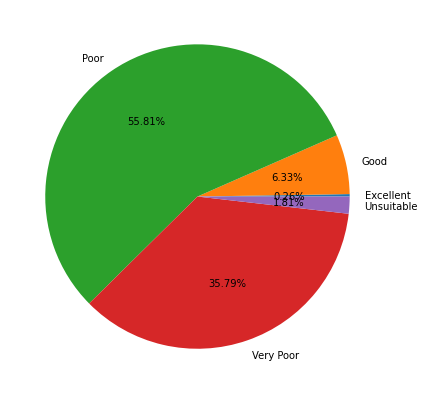

In [ ]:
create_pie_chart_for_river(2018)

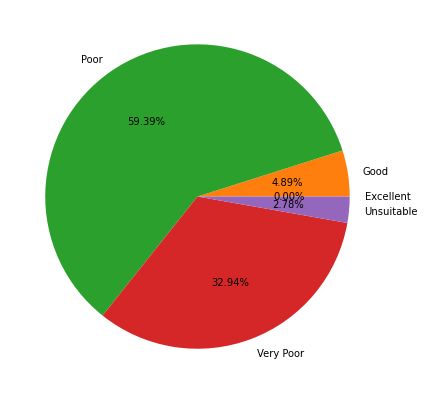

In [ ]:
create_pie_chart_for_river(2019)

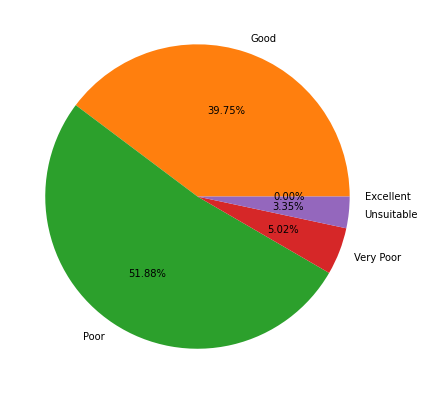

In [ ]:
list1 = [0,0,0,0,0]
for i in gw_df.index :
  wq = gw_df["wqi"][i]
  if wq >= 0 and wq <= 25 :
    list1[0] = list1[0] + 1
  elif wq >= 26 and wq <= 50 :
    list1[1] = list1[1] + 1
  elif wq >= 51 and wq <= 75 : 
    list1[2] = list1[2] + 1 
  elif wq >= 76 and wq <= 100 :
    list1[3] = list1[3] + 1
  else :
    list1[4] = list1[4] + 1
        
names = ["Excellent","Good","Poor","Very Poor","Unsuitable"]
fig = plt.figure(figsize =(10, 7))
plt.pie(list1,labels = names,autopct='%1.2f%%')
plt.show()

Prediction and plotting

In [ ]:
lstm_river_pred = [[],[],[],[]]


for i in river_station_codes :
  years = [2020,2021,2022,2023]
  for j in range(0,len(years)) :
    x_input = array([0,0,0,0,0,0,0,i,years[j]])
    x_input = x_input.reshape((1,n_steps,n_features))

    output = model.predict(x_input,verbose = 0)
    lstm_river_pred[j].append(output[0][0])

start = 0
end = 100
width = end - start

for i in range(len(lstm_river_pred)) :
  for j in range(len(lstm_river_pred[i])):
    lstm_river_pred[i][j] = (lstm_river_pred[i][j] - min(lstm_river_pred[i]))/(max(lstm_river_pred[i]) - min(lstm_river_pred[i])) * width + start

In [ ]:
count_list = [0,0,0,0,0,0]
sum_list = [0,0,0,0,0,0]

for i in river_df.index :
  if river_df["year"][i] == 2013 :
    count_list[0] = count_list[0] + 1
    sum_list[0] = sum_list[0] + river_df["wqi"][i]
  elif river_df["year"][i] == 2014 :
    count_list[1] = count_list[1] + 1
    sum_list[1] = sum_list[1] + river_df["wqi"][i]
  elif river_df["year"][i] == 2016 :
    count_list[2] = count_list[2] + 1
    sum_list[2] = sum_list[2] + river_df["wqi"][i]
  elif river_df["year"][i] == 2017 :
    count_list[3] = count_list[3] + 1
    sum_list[3] = sum_list[3] + river_df["wqi"][i]
  elif river_df["year"][i] == 2018 :
    count_list[4] = count_list[4] + 1
    sum_list[4] = sum_list[4] + river_df["wqi"][i]
  elif river_df["year"][i] == 2019 :
    count_list[5] = count_list[5] + 1
    sum_list[5] = sum_list[5] + river_df["wqi"][i]

for i in range(len(count_list)) :
  sum_list[i] = sum_list[i]/count_list[i]


In [ ]:
for i in range(len(lstm_river_pred)) :
  sum_list.append(sum(lstm_river_pred[i])/len(lstm_river_pred[i]))

In [ ]:
print(sum_list)

[71.63246891651886, 70.2326071428572, 70.12539325842721, 71.79196694214893, 71.99310077519398, 72.09825396825413, 76.17713142850218, 76.16903845470249, 76.16089430213984, 76.1527237765324]


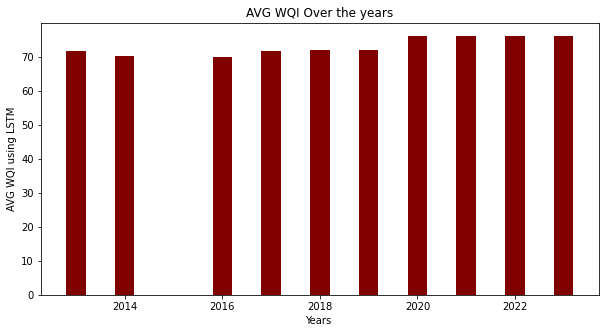

In [ ]:
fig = plt.figure(figsize = (10, 5))
years_list = [2013,2014,2016,2017,2018,2019,2020,2021,2022,2023]
plt.bar(years_list,sum_list, color ='maroon',width = 0.4)
 
plt.xlabel("Years ")
plt.ylabel("AVG WQI using LSTM")
plt.title("AVG WQI Over the years")
plt.show()

In [ ]:
bi_lstm_river_pred = [[],[],[],[]]


for i in river_station_codes :
  years = [2020,2021,2022,2023]
  for j in range(0,len(years)) :
    x_input = array([0,0,0,0,0,0,0,i,years[j]])
    x_input = x_input.reshape((1,n_steps,n_features))

    output = model2.predict(x_input,verbose = 0)
    bi_lstm_river_pred[j].append(output[0][0])

start = 0
end = 100
width = end - start
"""
for i in range(len(bi_lstm_river_pred)) :
  bi_lstm_river_pred[i] = (bi_lstm_river_pred[i] - min(bi_lstm_river_pred[i]))/(max(bi_lstm_river_pred[i]) - min(bi_lstm_river_pred[i])) * width + start
"""


'\nfor i in range(len(bi_lstm_river_pred)) :\n  bi_lstm_river_pred[i] = (bi_lstm_river_pred[i] - min(bi_lstm_river_pred[i]))/(max(bi_lstm_river_pred[i]) - min(bi_lstm_river_pred[i])) * width + start\n'

In [ ]:
sum_list_2 = []

for i in range(6) :
  sum_list_2.append(sum_list[i])
"""
for i in range(len(bi_lstm_river_pred)) :
  sum_list_2.append(sum(bi_lstm_river_pred[i])/len(bi_lstm_river_pred[i]))
"""

'\nfor i in range(len(bi_lstm_river_pred)) :\n  sum_list_2.append(sum(bi_lstm_river_pred[i])/len(bi_lstm_river_pred[i]))\n'

Linear Regression

In [ ]:
from sklearn import linear_model

x_features = [2013,2014,2016,2017,2018,2019]
x_features = np.array(x_features)
x_features = x_features.reshape(-1,1)
lin_model = linear_model.LinearRegression()
y = np.array(sum_list_2)
#print(x_features.shape)
#print(y.shape)
lin_model.fit(x_features,y)


LinearRegression()

In [ ]:
pred_years = [2020,2021,2022,2023]
pred_years = np.array(pred_years)
pred_years = pred_years.reshape(-1,1)

out = lin_model.predict(pred_years)


[72.08344291 72.28461102 72.48577912 72.68694723]


In [ ]:
sum_list_2.extend(out)

In [ ]:
print(sum_list_2)

[71.63246891651886, 70.2326071428572, 70.12539325842721, 71.79196694214893, 71.99310077519398, 72.09825396825413, 72.08344290934696, 72.28461101598526, 72.48577912262357, 72.68694722926188]


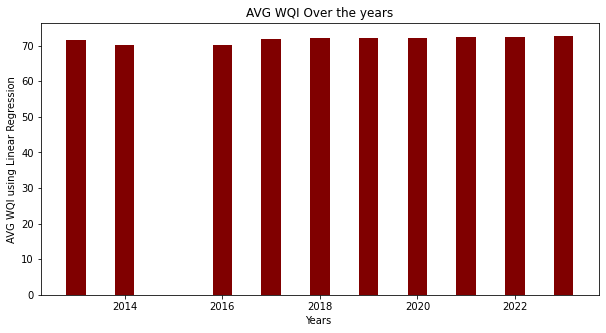

In [ ]:
fig = plt.figure(figsize = (10, 5))
years_list = [2013,2014,2016,2017,2018,2019,2020,2021,2022,2023]
plt.bar(years_list,sum_list_2, color ='maroon',width = 0.4)
 
plt.xlabel("Years ")
plt.ylabel("AVG WQI using Linear Regression")
plt.title("AVG WQI Over the years")
plt.show()